# 🎬 YouTube Trending Data Visualization
This notebook visualizes insights from the YouTube Trending Data stored in the SQLite database.

We’ll explore:
- Top categories by views and likes  
- Top channels by total views  
- Correlations between engagement metrics (views, likes, comments)

In [4]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# --- Load Data ---
conn = sqlite3.connect("../database/youtube.db")
df = pd.read_sql("SELECT * FROM videos", conn)
conn.close()

df.head()

,video_id,title,channel_title,category_name,views,likes,comment_count
0,kzwfHumJyYc,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,Film & Animation,1096327,33966,882
1,zUZ1z7FwLc8,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,News & Politics,590101,735,0
2,10L1hZ9qa58,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,Entertainment,473988,2011,149
3,N1vE8iiEg64,Eruma Saani | Tamil vs English,Eruma Saani,Comedy,1242680,70353,2684
4,kJzGH0PVQHQ,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,Entertainment,464015,492,66


In [6]:
sns.set(style="whitegrid")
plt.rcParams['axes.titlesize'] = 14

## 1️⃣ Top 10 Categories by Average Views
We’ll analyze which YouTube categories get the **highest average number of views**.

C:\Users\VarunAakash\AppData\Local\Temp\ipykernel_5396\1563603556.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_views.values, y=top_views.index, palette="coolwarm")


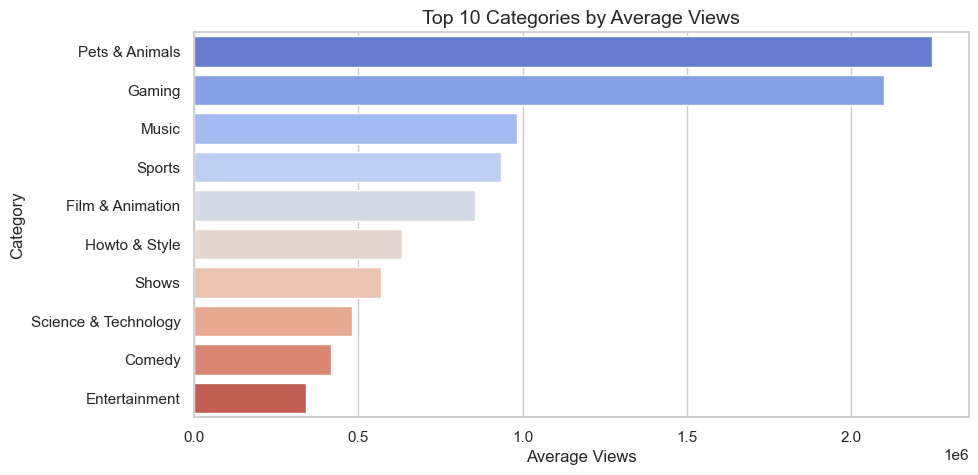

In [7]:
plt.figure(figsize=(10,5))
top_views = df.groupby("category_name")["views"].mean().sort_values(ascending=False).head(10)
sns.barplot(x=top_views.values, y=top_views.index, palette="coolwarm")
plt.title("Top 10 Categories by Average Views")
plt.xlabel("Average Views")
plt.ylabel("Category")
plt.show()

## 2️⃣ Top 10 Categories by Average Likes
Next, we’ll see which categories receive **the most likes on average**.

C:\Users\VarunAakash\AppData\Local\Temp\ipykernel_5396\3933655947.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_likes.values, y=top_likes.index, palette="mako")


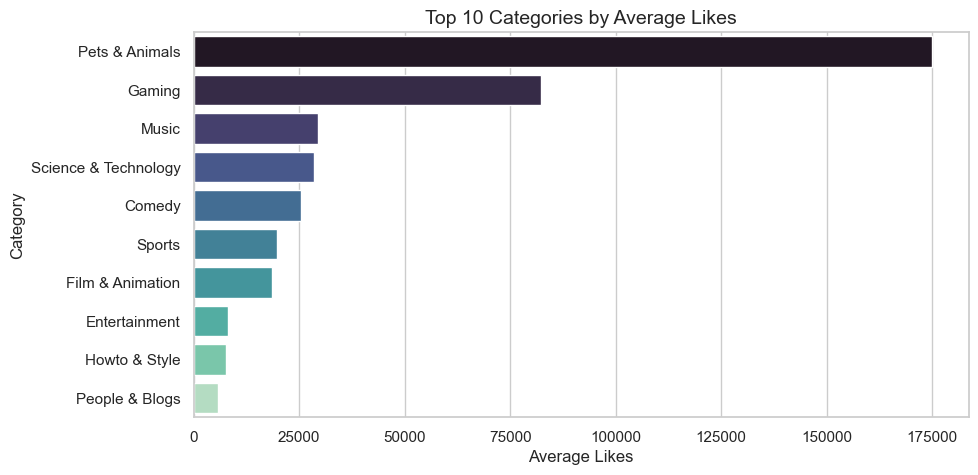

In [8]:
plt.figure(figsize=(10,5))
top_likes = df.groupby("category_name")["likes"].mean().sort_values(ascending=False).head(10)
sns.barplot(x=top_likes.values, y=top_likes.index, palette="mako")
plt.title("Top 10 Categories by Average Likes")
plt.xlabel("Average Likes")
plt.ylabel("Category")
plt.show()

## 3️⃣ Top 10 Channels by Total Views
Here, we identify which **channels** dominate YouTube trending videos by total accumulated views.

C:\Users\VarunAakash\AppData\Local\Temp\ipykernel_5396\324732830.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_channels.values, y=top_channels.index, palette="rocket")


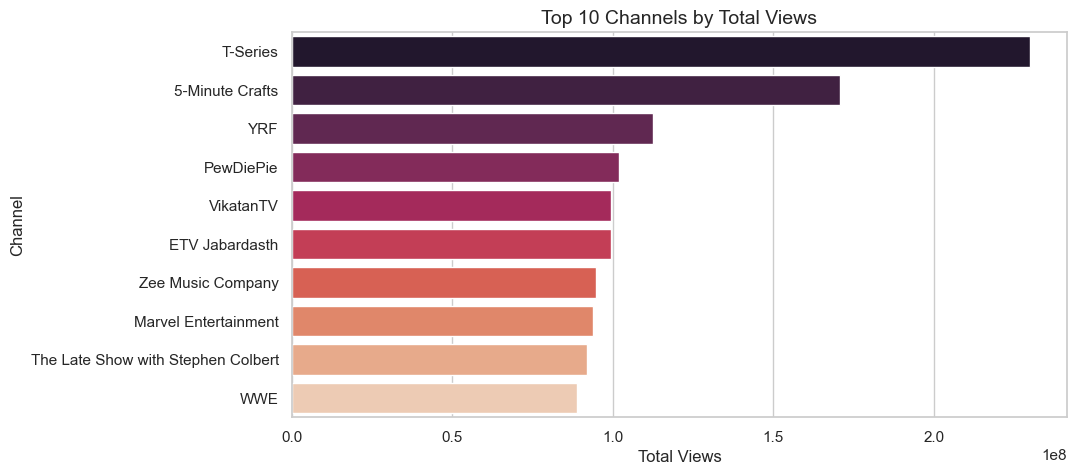

In [9]:
plt.figure(figsize=(10,5))
top_channels = df.groupby("channel_title")["views"].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_channels.values, y=top_channels.index, palette="rocket")
plt.title("Top 10 Channels by Total Views")
plt.xlabel("Total Views")
plt.ylabel("Channel")
plt.show()

## 4️⃣ Correlation between Views and Likes
A scatter plot showing how **likes relate to views** across videos.  
Usually, more views = more likes, but the strength of this correlation can vary.

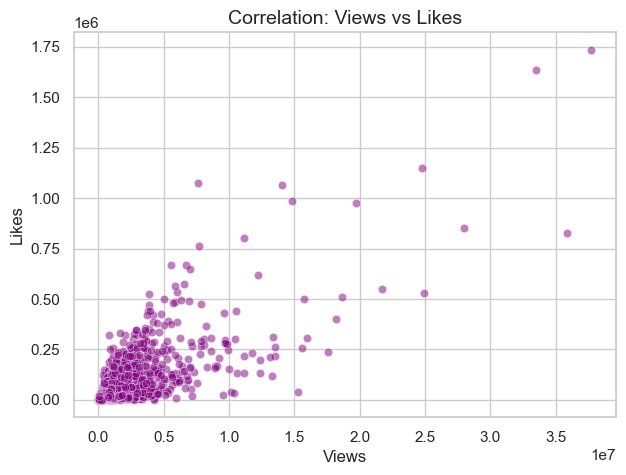

In [10]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x="views", y="likes", alpha=0.5, color="purple")
plt.title("Correlation: Views vs Likes")
plt.xlabel("Views")
plt.ylabel("Likes")
plt.show()

## 5️⃣ Top 10 Categories by Total Comments
Comments indicate audience engagement.  
Let’s find out which categories spark the **most conversation**.

C:\Users\VarunAakash\AppData\Local\Temp\ipykernel_5396\3283324620.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cat_comments.values, y=cat_comments.index, palette="crest")


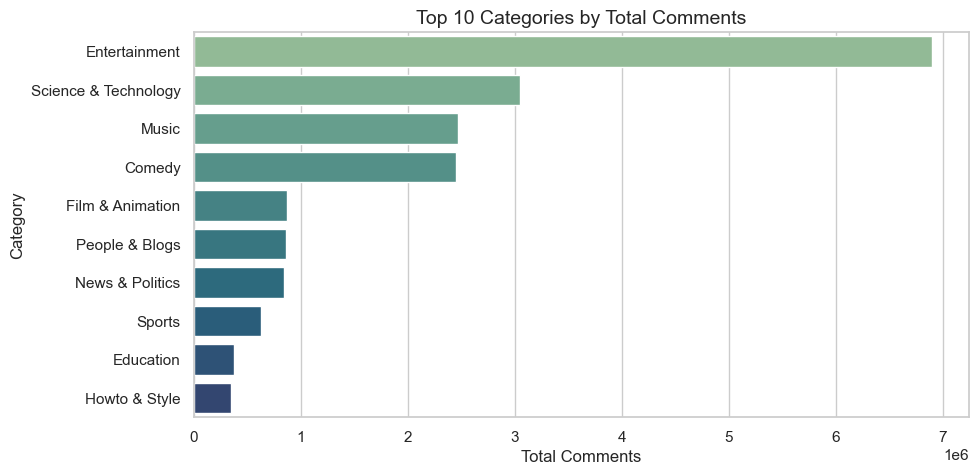

In [12]:
plt.figure(figsize=(10,5))
cat_comments = df.groupby("category_name")["comment_count"].sum().sort_values(ascending=False).head(10)
sns.barplot(x=cat_comments.values, y=cat_comments.index, palette="crest")
plt.title("Top 10 Categories by Total Comments")
plt.xlabel("Total Comments")
plt.ylabel("Category")
plt.show()


## 6️⃣ Correlation Heatmap
Finally, let’s visualize the **correlation** between views, likes, and comment counts.

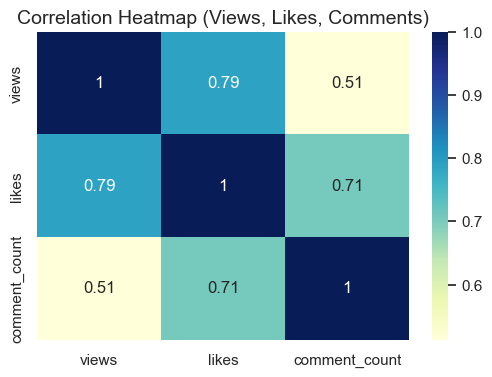

In [13]:
plt.figure(figsize=(6,4))
sns.heatmap(df[["views", "likes", "comment_count"]].corr(), annot=True, cmap="YlGnBu")
plt.title("Correlation Heatmap (Views, Likes, Comments)")
plt.show()